<a href="https://colab.research.google.com/github/Rukaya-lab/Cancer-Death-Rate/blob/main/Rukayat_Amzat_A3_Beg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Cancer Death Rate Prediction Analysis**

In [3]:
#importing useful libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [69]:
#metrics
from sklearn.linear_model import LinearRegression
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [5]:
# loading data directly from a github page.

train_data = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/cancer_death_rate/Training_set_label.csv")

In [6]:
test_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/cancer_death_rate/Testing_set_label.csv')

In [7]:
print(train_data.head())

print(train_data.shape)

   avgAnnCount  avgDeathsPerYear  ...  BirthRate  TARGET_deathRate
0         19.0                 8  ...  15.157116             160.3
1         88.0                34  ...   3.293510             194.9
2        195.0                83  ...   6.390328             196.5
3        116.0                55  ...   5.124836             230.9
4         80.0                35  ...   3.897033             162.2

[5 rows x 34 columns]
(3051, 34)


In [8]:
print(test_data.head())

print(test_data.shape)

   avgAnnCount  avgDeathsPerYear  ...  PctMarriedHouseholds  BirthRate
0  2092.000000               763  ...             56.335344   6.825886
1    94.000000                41  ...             55.288859   2.292861
2   126.000000                43  ...             52.614465  10.502567
3  1962.667684                16  ...             55.044700   9.342231
4  1962.667684                 4  ...             47.826087  10.029499

[5 rows x 33 columns]
(762, 33)


In [9]:
### feature description

#TARGET_deathRate: Dependent variable. Mean per capita (100,000) cancer mortalities(a)
#avgAnnCount: Mean number of reported cases of cancer diagnosed annually(a)
#avgDeathsPerYear: Mean number of reported mortalities due to cancer(a)
#incidenceRate: Mean per capita (100,000) cancer diagoses(a)
#medianIncome: Median income per county (b)
#popEst2015: Population of county (b)
#povertyPercent: Percent of populace in poverty (b)
#studyPerCap: Per capita number of cancer-related clinical trials per county (a)
#binnedInc: Median income per capita binned by decile (b)
#MedianAge: Median age of county residents (b)
#MedianAgeMale: Median age of male county residents (b)
#MedianAgeFemale: Median age of female county residents (b)
#Geography: County name (b)
#AvgHouseholdSize: Mean household size of county (b)
#PercentMarried: Percent of county residents who are married (b)
#PctNoHS18_24: Percent of county residents ages 18-24 highest education attained: less than high school (b)
#PctHS18_24: Percent of county residents ages 18-24 highest education attained: high school diploma (b)
#PctSomeCol18_24: Percent of county residents ages 18-24 highest education attained: some college (b)
#PctBachDeg18_24: Percent of county residents ages 18-24 highest education attained: bachelor's degree (b)
#PctHS25_Over: Percent of county residents ages 25 and over highest education attained: high school diploma (b)
#PctBachDeg25_Over: Percent of county residents ages 25 and over highest education attained: bachelor's degree (b)
#PctEmployed16_Over: Percent of county residents ages 16 and over employed (b)
#PctUnemployed16_Over: Percent of county residents ages 16 and over unemployed (b)
#PctPrivateCoverage: Percent of county residents with private health coverage (b)
#PctPrivateCoverageAlone: Percent of county residents with private health coverage alone (no public assistance) (b)
#PctEmpPrivCoverage: Percent of county residents with employee-provided private health coverage (b)
#PctPublicCoverage: Percent of county residents with government-provided health coverage (b)
#PctPubliceCoverageAlone: Percent of county residents with government-provided health coverage alone (b)
#PctWhite: Percent of county residents who identify as White (b)
#PctBlack: Percent of county residents who identify as Black (b)
#PctAsian: Percent of county residents who identify as Asian (b)
#PctOtherRace: Percent of county residents who identify in a category which is not White, Black, or Asian (b)
#PctMarriedHouseholds: Percent of married households (b)
#BirthRate: Number of live births relative to number of women in county (b)
#(a): years 2010-2016

#(b): 2013 Census Estimates

### EDA

In [10]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3051 entries, 0 to 3050
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgAnnCount              3051 non-null   float64
 1   avgDeathsPerYear         3051 non-null   int64  
 2   incidenceRate            3051 non-null   float64
 3   medIncome                3051 non-null   int64  
 4   popEst2015               3051 non-null   int64  
 5   povertyPercent           3051 non-null   float64
 6   studyPerCap              3051 non-null   float64
 7   binnedInc                3051 non-null   object 
 8   MedianAge                3051 non-null   float64
 9   MedianAgeMale            3051 non-null   float64
 10  MedianAgeFemale          3051 non-null   float64
 11  Geography                3051 non-null   object 
 12  AvgHouseholdSize         3051 non-null   float64
 13  PercentMarried           3051 non-null   float64
 14  PctNoHS18_24            

In [11]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 762 entries, 0 to 761
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgAnnCount              762 non-null    float64
 1   avgDeathsPerYear         762 non-null    int64  
 2   incidenceRate            762 non-null    float64
 3   medIncome                762 non-null    int64  
 4   popEst2015               762 non-null    int64  
 5   povertyPercent           762 non-null    float64
 6   studyPerCap              762 non-null    float64
 7   binnedInc                762 non-null    object 
 8   MedianAge                762 non-null    float64
 9   MedianAgeMale            762 non-null    float64
 10  MedianAgeFemale          762 non-null    float64
 11  Geography                762 non-null    object 
 12  AvgHouseholdSize         762 non-null    float64
 13  PercentMarried           762 non-null    float64
 14  PctNoHS18_24             7

In [12]:
train_data.describe()

,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,MedianAgeFemale,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctSomeCol18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,TARGET_deathRate
count,3051.000000,3051.000000,3051.000000,3051.000000,3.051000e+03,3051.000000,3051.000000,3051.000000,3051.000000,3051.000000,3051.000000,3051.000000,3051.000000,3051.000000,785.000000,3051.000000,3051.000000,3051.000000,2899.000000,3051.000000,3051.000000,2447.000000,3051.000000,3051.000000,3051.000000,3051.000000,3051.000000,3051.000000,3051.000000,3051.000000,3051.000000,3051.000000
mean,570.668154,176.000983,449.007042,46902.917076,9.495799e+04,16.880367,158.695936,44.303540,39.600885,42.234579,2.473048,51.885480,18.225139,34.920190,41.247898,6.131957,34.909440,13.212750,54.115626,7.841069,64.519338,48.573314,41.342347,36.287545,19.198820,84.005243,9.166570,1.198561,1.864829,51.355837,5.608851,178.909767
std,1250.546532,445.042777,52.886386,11902.460659,2.761007e+05,6.340462,544.035590,38.704107,5.177629,5.253474,0.429926,6.812846,8.105799,9.021475,11.107006,4.552222,7.015728,5.360342,8.267656,3.454863,10.511932,10.011218,9.327793,7.748442,6.023164,16.126982,14.676772,2.369931,3.235204,6.524964,1.955201,27.570075
min,6.000000,3.000000,211.100000,22640.000000,8.270000e+02,3.200000,0.000000,22.300000,22.400000,22.300000,0.022100,25.100000,0.000000,0.000000,7.100000,0.000000,7.500000,3.200000,17.600000,0.400000,23.400000,16.800000,14.300000,11.800000,2.600000,11.008762,0.000000,0.000000,0.000000,23.915652,0.000000,66.300000
25%,80.000000,29.000000,421.800000,38752.000000,1.236850e+04,12.200000,0.000000,37.900000,36.400000,39.200000,2.370000,47.800000,12.800000,29.300000,34.000000,3.100000,30.650000,9.300000,48.600000,5.500000,57.500000,41.300000,34.700000,31.000000,14.900000,78.012571,0.616576,0.261748,0.282825,47.736828,4.499936,161.400000
50%,171.000000,62.000000,453.549422,45098.000000,2.677700e+04,15.900000,0.000000,41.000000,39.500000,42.400000,2.500000,52.500000,17.200000,34.700000,41.000000,5.300000,35.400000,12.300000,54.400000,7.600000,65.300000,48.700000,41.300000,36.300000,18.800000,90.318790,2.276756,0.557031,0.791571,51.757925,5.384471,178.300000
75%,508.000000,148.000000,481.300000,52410.500000,6.853600e+04,20.400000,86.581336,43.900000,42.500000,45.300000,2.630000,56.500000,22.600000,40.700000,46.900000,8.100000,39.700000,16.100000,60.300000,9.700000,72.200000,55.700000,47.700000,41.400000,23.000000,95.577396,10.326954,1.189955,2.080241,55.465803,6.473896,195.500000
max,24965.000000,9445.000000,1206.900000,125635.000000,5.238216e+06,47.000000,9762.308998,525.600000,64.700000,65.700000,3.930000,72.500000,64.100000,72.500000,79.000000,51.800000,54.800000,40.400000,76.500000,29.400000,92.300000,78.900000,70.700000,65.100000,46.600000,100.000000,84.866024,35.640183,38.743747,71.703057,21.326165,362.800000


In [13]:
test_data.describe()

,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,MedianAgeFemale,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctSomeCol18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
count,762.000000,762.000000,762.000000,762.000000,7.620000e+02,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,182.000000,762.000000,762.000000,762.000000,729.000000,762.000000,762.000000,614.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000
mean,711.605491,220.711286,447.204162,47029.500000,1.282696e+05,16.980315,147.999759,47.133858,39.620997,42.022178,2.500591,51.539108,18.150394,35.191207,40.574176,6.231102,34.533333,13.391207,54.027435,7.967585,63.701050,47.805700,40.608661,36.477428,19.569554,82.788278,8.896343,1.340419,2.254919,50.926053,5.736898
std,1940.045693,695.011673,56.745238,11986.997138,4.792013e+05,6.536684,480.782424,56.374276,5.469577,5.491687,0.403520,7.181519,7.939906,9.011131,11.438374,4.225098,7.113428,5.503342,8.535290,3.534852,11.037942,10.386014,9.816577,8.237832,6.459500,17.320289,14.432993,2.972052,4.090086,6.800150,2.065069
min,7.000000,3.000000,201.300000,24707.000000,1.337000e+03,4.000000,0.000000,23.300000,22.800000,22.800000,0.024000,23.100000,1.500000,7.100000,10.100000,0.000000,11.500000,2.500000,23.900000,0.700000,22.300000,15.700000,13.500000,11.200000,5.700000,10.199155,0.000000,0.000000,0.000000,22.992490,0.000000
25%,68.000000,26.000000,417.375000,38730.500000,1.075350e+04,12.300000,0.000000,37.500000,36.225000,38.900000,2.370000,47.700000,12.700000,29.125000,33.700000,3.225000,29.625000,9.500000,48.100000,5.800000,56.300000,39.950000,33.525000,30.800000,14.925000,76.468705,0.613335,0.236915,0.297753,47.607275,4.608878
50%,162.500000,60.000000,453.549422,45238.500000,2.611850e+04,15.800000,0.000000,41.100000,39.800000,42.350000,2.500000,52.250000,17.100000,35.000000,39.300000,5.500000,34.950000,12.300000,54.600000,7.500000,64.300000,48.250000,40.600000,36.600000,18.950000,89.464327,2.120925,0.538765,0.846727,51.336903,5.367187
75%,535.750000,151.000000,479.875000,52310.500000,7.086150e+04,20.400000,80.313645,44.275000,42.875000,45.500000,2.640000,56.100000,22.975000,40.575000,45.475000,8.375000,39.500000,16.100000,60.100000,9.900000,71.800000,55.500000,47.275000,42.175000,23.775000,95.162772,10.811476,1.325862,2.382843,55.208111,6.583930
max,38150.000000,14010.000000,1014.200000,103876.000000,1.017029e+07,47.400000,6810.442679,624.000000,58.600000,58.000000,3.970000,72.300000,59.100000,66.200000,78.300000,32.600000,50.200000,42.200000,80.100000,25.400000,87.900000,76.300000,68.800000,62.200000,43.300000,99.693045,85.947799,42.619425,41.930251,78.075397,18.556701


In [14]:
train_data.isnull().sum()

avgAnnCount                   0
avgDeathsPerYear              0
incidenceRate                 0
medIncome                     0
popEst2015                    0
povertyPercent                0
studyPerCap                   0
binnedInc                     0
MedianAge                     0
MedianAgeMale                 0
MedianAgeFemale               0
Geography                     0
AvgHouseholdSize              0
PercentMarried                0
PctNoHS18_24                  0
PctHS18_24                    0
PctSomeCol18_24            2266
PctBachDeg18_24               0
PctHS25_Over                  0
PctBachDeg25_Over             0
PctEmployed16_Over          152
PctUnemployed16_Over          0
PctPrivateCoverage            0
PctPrivateCoverageAlone     604
PctEmpPrivCoverage            0
PctPublicCoverage             0
PctPublicCoverageAlone        0
PctWhite                      0
PctBlack                      0
PctAsian                      0
PctOtherRace                  0
PctMarri

In [15]:
# filling missing values with mean since they are numeric values

train_data= train_data.fillna(train_data.mean())

In [16]:
train_data.isnull().sum()

avgAnnCount                0
avgDeathsPerYear           0
incidenceRate              0
medIncome                  0
popEst2015                 0
povertyPercent             0
studyPerCap                0
binnedInc                  0
MedianAge                  0
MedianAgeMale              0
MedianAgeFemale            0
Geography                  0
AvgHouseholdSize           0
PercentMarried             0
PctNoHS18_24               0
PctHS18_24                 0
PctSomeCol18_24            0
PctBachDeg18_24            0
PctHS25_Over               0
PctBachDeg25_Over          0
PctEmployed16_Over         0
PctUnemployed16_Over       0
PctPrivateCoverage         0
PctPrivateCoverageAlone    0
PctEmpPrivCoverage         0
PctPublicCoverage          0
PctPublicCoverageAlone     0
PctWhite                   0
PctBlack                   0
PctAsian                   0
PctOtherRace               0
PctMarriedHouseholds       0
BirthRate                  0
TARGET_deathRate           0
dtype: int64

In [17]:
test_data.isnull().sum()

avgAnnCount                  0
avgDeathsPerYear             0
incidenceRate                0
medIncome                    0
popEst2015                   0
povertyPercent               0
studyPerCap                  0
binnedInc                    0
MedianAge                    0
MedianAgeMale                0
MedianAgeFemale              0
Geography                    0
AvgHouseholdSize             0
PercentMarried               0
PctNoHS18_24                 0
PctHS18_24                   0
PctSomeCol18_24            580
PctBachDeg18_24              0
PctHS25_Over                 0
PctBachDeg25_Over            0
PctEmployed16_Over          33
PctUnemployed16_Over         0
PctPrivateCoverage           0
PctPrivateCoverageAlone    148
PctEmpPrivCoverage           0
PctPublicCoverage            0
PctPublicCoverageAlone       0
PctWhite                     0
PctBlack                     0
PctAsian                     0
PctOtherRace                 0
PctMarriedHouseholds         0
BirthRat

In [18]:
# filling missing values with mean since they are numeric values

test_data= test_data.fillna(test_data.mean())

In [19]:
test_data.isnull().sum()

avgAnnCount                0
avgDeathsPerYear           0
incidenceRate              0
medIncome                  0
popEst2015                 0
povertyPercent             0
studyPerCap                0
binnedInc                  0
MedianAge                  0
MedianAgeMale              0
MedianAgeFemale            0
Geography                  0
AvgHouseholdSize           0
PercentMarried             0
PctNoHS18_24               0
PctHS18_24                 0
PctSomeCol18_24            0
PctBachDeg18_24            0
PctHS25_Over               0
PctBachDeg25_Over          0
PctEmployed16_Over         0
PctUnemployed16_Over       0
PctPrivateCoverage         0
PctPrivateCoverageAlone    0
PctEmpPrivCoverage         0
PctPublicCoverage          0
PctPublicCoverageAlone     0
PctWhite                   0
PctBlack                   0
PctAsian                   0
PctOtherRace               0
PctMarriedHouseholds       0
BirthRate                  0
dtype: int64

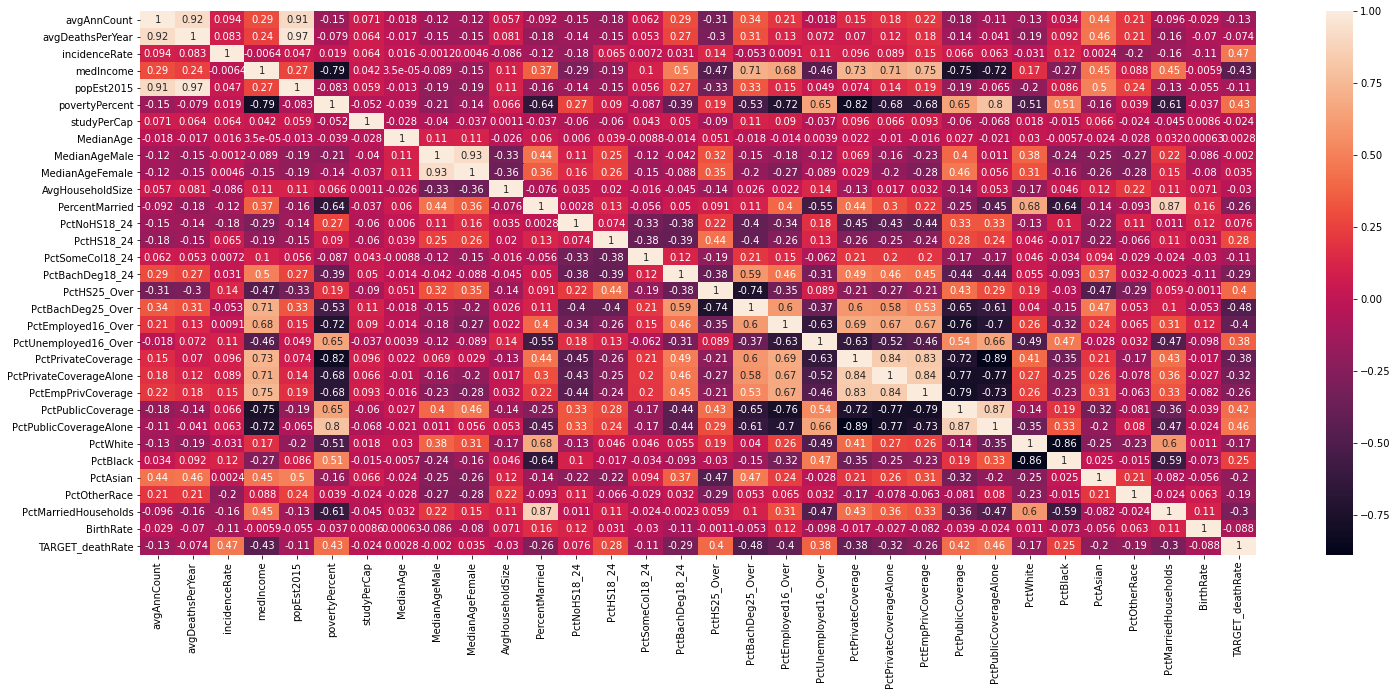

In [20]:
plt.figure(figsize = (25,10))

sns.heatmap(train_data.corr(), annot= True)

In [21]:
train_data['binnedInc'].value_counts()

(37413.8, 40362.7]    318
(51046.4, 54545.6]    318
(54545.6, 61494.5]    315
(34218.1, 37413.8]    309
(42724.4, 45201]      306
(40362.7, 42724.4]    306
[22640, 34218.1]      301
(45201, 48021.6]      299
(48021.6, 51046.4]    297
(61494.5, 125635]     282
Name: binnedInc, dtype: int64

In [26]:
train_data['Geography'].value_counts()

Glades County, Florida             2
Harrison County, Texas             2
Greeley County, Nebraska           2
Gilmer County, Georgia             2
Mariposa County, California        2
                                  ..
Nome Census Area, Alaska           1
Concordia Parish, Louisiana        1
Pointe Coupee Parish, Louisiana    1
Monroe County, Illinois            1
Edmonson County, Kentucky          1
Name: Geography, Length: 2285, dtype: int64

In [27]:
test_data['binnedInc'].value_counts()

(61494.5, 125635]     84
(45201, 48021.6]      82
(48021.6, 51046.4]    81
(34218.1, 37413.8]    81
(40362.7, 42724.4]    79
[22640, 34218.1]      79
(42724.4, 45201]      72
(51046.4, 54545.6]    70
(37413.8, 40362.7]    68
(54545.6, 61494.5]    66
Name: binnedInc, dtype: int64

In [28]:
test_data['Geography'].value_counts()

Osceola County, Florida         1
Lander County, Nevada           1
Leavenworth County, Kansas      1
Hartford County, Connecticut    1
Edwards County, Illinois        1
                               ..
Hart County, Kentucky           1
Kent County, Michigan           1
Washburn County, Wisconsin      1
Vanderburgh County, Indiana     1
Lancaster County, Nebraska      1
Name: Geography, Length: 762, dtype: int64

In [29]:
train_data.duplicated().sum()

766

In [30]:
test_data.duplicated().sum()

0

In [36]:
# converting the categorical column in the train dataset to numerical

train_data['Geography'] = train_data['Geography'].astype('category').cat.codes

In [37]:
train_data['binnedInc'] = train_data['binnedInc'].astype('category').cat.codes

In [38]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3051 entries, 0 to 3050
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgAnnCount              3051 non-null   float64
 1   avgDeathsPerYear         3051 non-null   int64  
 2   incidenceRate            3051 non-null   float64
 3   medIncome                3051 non-null   int64  
 4   popEst2015               3051 non-null   int64  
 5   povertyPercent           3051 non-null   float64
 6   studyPerCap              3051 non-null   float64
 7   binnedInc                3051 non-null   int8   
 8   MedianAge                3051 non-null   float64
 9   MedianAgeMale            3051 non-null   float64
 10  MedianAgeFemale          3051 non-null   float64
 11  Geography                3051 non-null   int16  
 12  AvgHouseholdSize         3051 non-null   float64
 13  PercentMarried           3051 non-null   float64
 14  PctNoHS18_24            

In [39]:
# converting the categorical column in the test dataset to numerical

test_data['Geography'] = test_data['Geography'].astype('category').cat.codes

In [40]:
test_data['binnedInc'] = test_data['binnedInc'].astype('category').cat.codes

In [41]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 762 entries, 0 to 761
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgAnnCount              762 non-null    float64
 1   avgDeathsPerYear         762 non-null    int64  
 2   incidenceRate            762 non-null    float64
 3   medIncome                762 non-null    int64  
 4   popEst2015               762 non-null    int64  
 5   povertyPercent           762 non-null    float64
 6   studyPerCap              762 non-null    float64
 7   binnedInc                762 non-null    int8   
 8   MedianAge                762 non-null    float64
 9   MedianAgeMale            762 non-null    float64
 10  MedianAgeFemale          762 non-null    float64
 11  Geography                762 non-null    int16  
 12  AvgHouseholdSize         762 non-null    float64
 13  PercentMarried           762 non-null    float64
 14  PctNoHS18_24             7

In [50]:
## splitting the train data into target and features

X = train_data.drop('TARGET_deathRate', axis= 1)

y = train_data['TARGET_deathRate']

In [51]:
col_names= X.columns
col_names

Index(['avgAnnCount', 'avgDeathsPerYear', 'incidenceRate', 'medIncome',
       'popEst2015', 'povertyPercent', 'studyPerCap', 'binnedInc', 'MedianAge',
       'MedianAgeMale', 'MedianAgeFemale', 'Geography', 'AvgHouseholdSize',
       'PercentMarried', 'PctNoHS18_24', 'PctHS18_24', 'PctSomeCol18_24',
       'PctBachDeg18_24', 'PctHS25_Over', 'PctBachDeg25_Over',
       'PctEmployed16_Over', 'PctUnemployed16_Over', 'PctPrivateCoverage',
       'PctPrivateCoverageAlone', 'PctEmpPrivCoverage', 'PctPublicCoverage',
       'PctPublicCoverageAlone', 'PctWhite', 'PctBlack', 'PctAsian',
       'PctOtherRace', 'PctMarriedHouseholds', 'BirthRate'],
      dtype='object')

In [52]:
#scaling the train data

from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)
X = pd.DataFrame(data= X, columns= col_names)


# Let's see how the data looks after scaling
X.head()

,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,MedianAgeMale,MedianAgeFemale,Geography,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctSomeCol18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,-0.441214,-0.377556,0.614492,0.263441,-0.334186,-0.911813,-0.291749,0.188202,0.105858,1.931532,0.793019,-0.336031,-0.518890,2.057410,-0.916178,-1.099800,2.868766e+00,0.146775,0.312287,-0.188965,0.407607,-1.951502,1.587091,8.285162e-01,-0.604995,-0.204919,-1.544096,0.745879,-0.575265,-0.505820,-0.576512,1.709963,4.884323
1,-0.386029,-0.319125,0.699594,1.050046,-0.290210,-1.132653,-0.291749,0.885051,-0.062111,0.328219,0.183798,0.363191,0.365127,0.985729,0.502792,-0.645254,-5.047964e-15,-1.105566,0.141215,0.520061,0.779923,-1.169867,1.158936,4.756061e-15,1.014088,-0.540526,-1.062543,0.839234,-0.575603,-0.471744,-0.564031,1.576544,-1.184390
2,-0.300452,-0.209005,0.504805,-0.603497,-0.252826,0.255486,-0.291749,-1.205497,0.118778,1.603142,1.459354,-0.573132,-0.402572,0.780201,0.823602,0.141886,-5.047964e-15,-0.578264,0.754224,-1.047260,-1.602895,0.914493,-0.277762,4.756061e-15,-0.991002,1.744179,0.398723,0.841667,-0.600080,-0.332052,-0.551054,0.401948,0.399757
3,-0.363635,-0.271931,0.900057,-1.395227,-0.279078,1.769819,-0.291749,1.581901,-0.002676,0.598657,0.564561,-0.710561,-0.100145,0.163618,-0.903839,1.871377,-5.047964e-15,-0.182788,1.324465,-1.159211,-1.553253,0.740797,-1.838150,4.756061e-15,-1.838072,2.183049,2.291726,0.862262,-0.613644,-0.376372,-0.471341,-0.052529,-0.247593
4,-0.392427,-0.316878,-1.456323,-0.611563,-0.293057,0.081968,-0.291749,-1.205497,0.017997,0.502072,1.097629,0.006784,-0.262990,0.046173,-0.694079,-0.412438,-5.047964e-15,-1.303304,-0.942243,-0.506161,-0.597644,0.393403,-0.753490,4.756061e-15,-0.851611,0.866439,0.913487,-0.082651,-0.499679,-0.217740,1.975048,-0.121003,-0.875664


In [53]:
#scaling the test data

from sklearn.preprocessing import StandardScaler
test_data = StandardScaler().fit_transform(test_data)
test_data = pd.DataFrame(data= test_data, columns= col_names)


# Let's see how the data looks after scaling
test_data.head()

,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,MedianAgeMale,MedianAgeFemale,Geography,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctSomeCol18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,0.711994,0.780771,-1.872825,-1.056963,1.491030,2.528887,-0.219078,-1.561593,-0.325430,-2.235826,-2.172376,-0.393235,2.775930,-0.075118,0.522970,-0.687513,0.000000,-0.267886,-1.594277,-0.271142,-0.219046,0.547034,-2.819500,0.000000,-1.805140,0.099919,1.336963,0.498093,-0.573802,-0.100526,0.868466,0.795989,0.527683
1,-0.318555,-0.258743,-0.035342,-0.952866,-0.232969,0.691888,-0.308033,-1.561593,-0.100002,0.233993,0.014180,-1.588851,0.444902,0.064220,-1.052390,0.100918,0.937408,0.489990,1.767772,-0.998450,-0.902278,0.292259,-0.734410,-0.827200,-0.418818,1.010950,1.058121,0.812061,-0.558780,-0.324525,-0.544364,0.641996,-1.668854
2,-0.302050,-0.255863,-0.379209,2.474512,-0.200706,-1.435969,-0.243304,1.205695,-0.215379,-0.991769,-1.097319,1.270626,-0.150254,0.593703,-0.649098,-0.931816,0.000000,0.892612,-0.567375,0.747090,2.082368,-1.462856,1.776764,2.167840,1.558729,-2.050116,-2.117584,0.568367,-0.539539,-0.027915,-0.100448,0.248454,2.309269
3,0.645286,-0.294737,0.111894,-0.097962,-0.256515,-0.854253,-0.308033,-0.177949,-0.043202,0.837727,0.633704,0.729644,-0.522226,1.248591,1.896684,-2.364319,0.847718,0.324205,0.107848,0.383436,1.087486,-1.038231,1.096844,0.804506,0.396665,-0.373818,-0.630424,0.812693,-0.590327,-0.390099,-0.511649,0.606068,1.747012
4,0.645286,-0.312014,0.111894,0.560099,-0.264362,-0.930794,-0.308033,0.513873,8.663290,0.929201,0.433270,0.002273,-1.067786,0.607637,0.888453,-0.454315,0.000000,-0.765243,-0.679912,0.383436,1.662839,-1.576089,1.314418,0.954795,0.814600,-0.883996,-1.296548,0.897750,-0.591944,-0.451304,-0.551676,-0.456167,2.080037


In [54]:
## splitting the train data into train and validation set

X_train, X_val, y_train, y_val= train_test_split(X, y, train_size= 0.8, random_state= 42)

## **Fitting models to the data**

**Linear Regression Model**

In [55]:
# linear regression model

lrm_model= LinearRegression()

lrm_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [56]:
lrm_predict= lrm_model.predict(X_val)

In [58]:
print(lrm_model.score(X_val,lrm_predict))

print(lrm_model.score(X_train,y_train))

print(lrm_model.score(X_val,y_val))

1.0
0.5280691565718539
0.5435342349336534


In [59]:
# Mean Squared Error 

from sklearn.metrics import mean_squared_error
MSE_lrm = mean_squared_error(y_val, lrm_predict)

print(MSE_lrm)

375.0409914278659


In [60]:
# using the linear model to predict death rate for the test data

predictions1 = lrm_model.predict(test_data)

In [61]:
print(predictions1)

[163.92834529 193.41124563 157.52736592 156.11258478 154.02052142
 178.9062257  184.13130321 166.1086967  151.75584498 183.04255468
 150.72070494 184.35410843 155.99588463 165.63764125 196.78453657
 181.52355684 193.94826843 150.08321221 171.68114051 176.25131504
 179.95576236 205.78638081 175.02292696 173.47999492 130.35193008
 147.4408203  183.71377878 238.06868684 172.63465984 184.04536893
 155.15299979 172.31188373 161.98629507 168.30319623 148.22163527
 172.55100801 147.95321231 193.99725293 153.49795374 183.15524311
 198.05926008 175.4460108  176.22336467 168.93947418 193.87984495
 157.06344519 164.95168138 179.8304739  195.31679345 164.0443773
 151.75235189 175.85484854 182.91378589 164.68227903 163.11820581
 174.42671918 183.84621251 188.28832423 174.75746207 163.02741058
 173.61132694 191.06790853 184.8250925  180.51422358 170.5254827
 171.25275285 168.77053088 188.4442112  180.60580102 144.34918317
 200.4115459  184.80619419 177.27907193 150.17275703 173.01534245
 164.5793421

**Random Forest Regressor Model**

In [62]:
# random forest model

rdf_model= RandomForestRegressor(random_state= 42, n_estimators= 100)

rdf_model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [63]:
rdf_predict= rdf_model.predict(X_val)

In [64]:
print(rdf_model.score(X_train, y_train))

print(rdf_model.score(X_val, rdf_predict))

print(rdf_model.score(X_val, y_val))

0.9592575845293573
1.0
0.6822885626912729


In [65]:
# Mean Squared Error 

from sklearn.metrics import mean_squared_error
MSE_rdf = mean_squared_error(y_val, rdf_predict)

print(MSE_rdf)

261.03778542716844


In [66]:
# using the forest model to predict death rate for the test data

predictions2 = rdf_model.predict(test_data)

In [67]:
print(predictions2)

[141.861 195.983 163.834 160.783 159.752 176.969 187.301 168.974 155.938
 180.308 153.798 191.653 165.149 167.631 198.95  170.671 190.206 169.712
 173.848 175.852 174.594 230.903 170.883 175.866 136.92  160.162 184.948
 233.417 162.987 176.679 159.647 175.449 161.889 170.3   158.158 165.247
 164.731 209.659 155.744 180.473 199.859 178.426 178.59  172.464 169.272
 160.624 172.09  192.466 188.443 171.737 152.877 172.835 180.275 169.629
 162.95  186.009 195.192 195.25  188.387 164.609 178.419 185.951 181.041
 179.967 185.406 171.291 181.52  184.091 193.061 163.988 190.916 182.833
 175.199 152.848 188.733 174.412 182.162 178.265 162.37  191.994 199.461
 157.799 195.178 177.201 190.113 175.799 159.468 195.082 198.72  196.571
 200.597 173.587 149.077 167.645 175.72  166.499 190.943 158.367 166.54
 189.774 140.753 170.331 172.805 185.415 195.771 177.611 171.657 161.383
 199.299 209.027 182.968 162.77  158.503 158.74  204.695 172.338 186.251
 179.715 225.652 155.556 196.64  174.112 158.182 205

**Decision Tree Regressor Model**

In [71]:
# Decision Tree Model

dtr_model = DecisionTreeRegressor(random_state= 42)

dtr_model.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [72]:
dtr_predict= dtr_model.predict(X_val)

In [73]:
print(dtr_model.score(X_val,dtr_predict))

print(dtr_model.score(X_train,y_train))

print(dtr_model.score(X_val,y_val))

1.0
1.0
0.34841707280275347


In [74]:
# Mean Squared Error 

from sklearn.metrics import mean_squared_error
MSE_dtr = mean_squared_error(y_val, dtr_predict)

print(MSE_dtr)

535.3529787234044


In [75]:
# using the tree model to predict death rate for the test data

predictions3 = dtr_model.predict(test_data)

In [76]:
print(predictions3)

[131.2 191.2 181.5 165.2 172.1 179.9 193.9 193.2 154.8 212.3  94.4 191.7
 174.2 155.5 205.3 147.  193.7 163.5 186.7 178.2 177.5 216.7 179.8 179.9
 139.  151.9 195.9 266.2 163.6 172.8 140.8 189.7 151.8 176.6 169.2 147.
 122.5 220.9 138.2 258.7 224.3 180.  170.6 161.9 124.3 152.5 131.8 204.4
 199.1 188.3 164.7 162.6 191.8 170.6 179.7 193.5 172.4 202.8 175.8 155.6
 189.2 185.5 173.6 194.3 206.  186.3 151.7 167.8 187.9 187.2 199.1 167.6
 170.9 152.1 160.  177.7 198.4 193.9 167.9 208.1 202.9 159.9 198.2 169.7
 182.4 185.8 156.5 178.1 220.2 195.7 178.  185.6 136.9 163.5 258.7 177.5
 184.1  97.3 147.2 183.5 148.9 184.1 185.  205.4 198.2 185.1 168.4 170.1
 236.4 225.4 175.  200.4 164.  181.7 175.3 185.6 203.6 155.6 236.  172.2
 188.9 181.2 154.4 184.3 182.4 177.6 176.1 202.2 184.1 193.2 189.8 181.
 186.  238.4 163.6 139.  176.1 163.  198.4 185.  205.9 127.1 198.5 179.1
 193.9 153.2 211.2 148.9 220.2 201.4 183.7 230.  234.9 178.3 127.1 148.9
 233.1 158.6 198.5 102.6 143.8 164.9 160.9 170.1 125.

**HyperTuning On the Forest Model**

In [77]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True, False],
    'max_depth': [5, 10, 15],
    'n_estimators': [500, 1000]}

In [78]:
rdf= RandomForestRegressor(random_state= 42)

# Grid search cv
grid_search = GridSearchCV(estimator = rdf, param_grid = param_grid, 
                          cv = 2, n_jobs = -1, verbose = 2)

In [79]:
grid_search.fit(X_train, y_train)

Fitting 2 folds for each of 12 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:  4.9min finished


GridSearchCV(cv=2, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs

In [80]:
grid_search.best_params_

{'bootstrap': True, 'max_depth': 15, 'n_estimators': 1000}

In [82]:
# mean_squared error

MSE_rdf_hpt = mean_squared_error(y_val, grid_search.predict(X_val))

print(MSE_rdf_hpt)

258.3068605925751


In [83]:
predictions4= grid_search.predict(test_data)

In [84]:
print(predictions4)

[141.8653867  197.12481247 163.58991498 160.59231085 161.54879886
 177.45153629 187.52088416 171.03838745 155.11081325 180.61085607
 157.2940503  190.65214092 163.44073228 167.27543606 201.25427572
 171.57651133 190.25126236 170.539082   174.18464612 175.7012816
 174.21959084 232.01314663 172.41897712 176.51114815 136.5911
 159.9279935  184.72475092 233.43908931 161.38387193 176.14671519
 159.37290964 173.51185299 162.6818385  170.07944896 156.99067035
 166.72504616 165.07041161 208.18803968 156.90462673 183.43943356
 196.56370685 175.58549214 184.23379761 173.51977804 167.67731614
 160.49114147 173.09268892 190.84381052 189.54097804 172.70093259
 151.86538442 170.77876363 182.3208664  169.62572541 163.49511035
 186.04693424 194.24426138 197.78738658 184.81395063 164.73765662
 179.49845604 185.22366474 179.97526854 178.88615607 185.28844523
 171.84649245 181.5258055  186.03889548 191.00241672 162.41976251
 192.82477955 180.36520069 176.6137165  152.96067046 186.03551066
 174.46602226 1

**HyperTunning on the Tree Model**

In [105]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'criterion': ['mse','mae', 'friedman_mse'],
    'max_depth': [5, 10, 15]}

In [106]:
dtr= DecisionTreeRegressor(random_state= 42,)

# Grid search cv
grid_search = GridSearchCV(estimator = dtr, param_grid = param_grid, 
                          cv = 2, n_jobs = -1, verbose = 2)

In [107]:
grid_search.fit(X_train, y_train)

Fitting 2 folds for each of 9 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  18 | elapsed:    1.5s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    1.9s finished


GridSearchCV(cv=2, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=42, splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['mse', 'mae', 'friedman_mse'],
                         'max_depth': [5, 10, 15]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
      

In [108]:
grid_search.best_params_

{'criterion': 'friedman_mse', 'max_depth': 5}

In [109]:
 # mean_squared error

MSE_dtr_hpt = mean_squared_error(y_val, grid_search.predict(X_val))

print(MSE_dtr_hpt)

501.0159931311025


In [111]:
predictions5= grid_search.predict(test_data)

In [112]:
print(predictions5)

[163.99084507 196.77612903 162.11554404 178.60297483 178.60297483
 177.86363636 190.19117647 178.60297483 151.8375     196.77612903
  88.67777778 196.77612903 162.11554404 163.99084507 196.77612903
 162.11554404 178.60297483 173.86153846 178.60297483 163.94646465
 178.60297483 232.34666667 163.99084507 163.94646465 138.98125
 162.11554404 196.77612903 232.34666667 162.11554404 178.60297483
 163.94646465 178.60297483 163.94646465 173.86153846 163.99084507
 162.11554404 141.40833333 190.19117647 143.20384615 192.01134021
 196.77612903 177.86363636 190.19117647 177.86363636 166.33055556
 143.20384615 173.86153846 190.19117647 196.77612903 177.86363636
 151.8375     178.60297483 163.99084507 178.60297483 178.60297483
 192.01134021 173.86153846 196.77612903 190.19117647 162.11554404
 166.33055556 178.60297483 178.60297483 162.11554404 196.77612903
 178.60297483 196.77612903 173.86153846 196.77612903 162.11554404
 196.77612903 177.86363636 178.60297483 151.8375     196.77612903
 177.86363636

**Feature Selection with Boruta**

In [114]:
!pip install Boruta

     |████████████████████████████████| 61kB 2.8MB/s 


In [115]:
from boruta import BorutaPy

In [118]:
rdf = RandomForestRegressor(random_state= 42, n_estimators= 1000, max_depth= 15, criterion= 'mse')

boruta_selector = BorutaPy(rdf, n_estimators='auto', verbose=2, random_state= 42)   # initialize the boruta selector

boruta_selector.fit(np.array(X_train), np.array(y_train))       # fitting the boruta selector to get all relavent features. 
# NOTE: BorutaPy accepts numpy arrays only.

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	33
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	33
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	33
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	33
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	33
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	33
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	33
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	27
Tentative: 	3
Rejected: 	3
Iteration: 	9 / 100
Confirmed: 	27
Tentative: 	3
Rejected: 	3
Iteration: 	10 / 100
Confirmed: 	27
Tentative: 	3
Rejected: 	3
Iteration: 	11 / 100
Confirmed: 	27
Tentative: 	3
Rejected: 	3
Iteration: 	12 / 100
Confirmed: 	27
Tentative: 	3
Rejected: 	3
Iteration: 	13 / 100
Confirmed: 	27
Tentative: 	3
Rejected: 	3
Iteration: 	14 / 100
Confirmed: 	27
Tentative: 	3
Rejected: 	3
Iteration: 	15 / 100
Confirmed: 	27
Tentative: 	3
Rejected: 	3
Iteration: 	16 / 100
Confirmed: 	27
Tentative: 	3
Rejected: 	3
I

BorutaPy(alpha=0.05,
         estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                         criterion='mse', max_depth=15,
                                         max_features='auto',
                                         max_leaf_nodes=None, max_samples=None,
                                         min_impurity_decrease=0.0,
                                         min_impurity_split=None,
                                         min_samples_leaf=1,
                                         min_samples_split=2,
                                         min_weight_fraction_leaf=0.0,
                                         n_estimators=49, n_jobs=None,
                                         oob_score=False,
                                         random_state=RandomState(MT19937) at 0x7F42CCAD6048,
                                         verbose=0, warm_start=False),
         max_iter=100, n_estimators='auto', perc=100,
         random_s

In [119]:
print("Selected Features: ", boruta_selector.support_)    # check selected features
 

print("Ranking: ",boruta_selector.ranking_)               # check ranking of features

print("No. of significant features: ", boruta_selector.n_features_)

Selected Features:  [ True  True  True  True  True  True False False False  True  True  True
  True  True  True  True False  True  True  True  True  True  True False
  True  True  True  True  True  True  True  True  True]
Ranking:  [1 1 1 1 1 1 4 5 3 1 1 1 1 1 1 1 5 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1]
No. of significant features:  28


In [120]:
selected_features = pd.DataFrame({
                                      'Ranking':boruta_selector.ranking_})
selected_features.sort_values(by='Ranking')

,Ranking
0,1
30,1
29,1
28,1
27,1
26,1
25,1
24,1
22,1
21,1


In [121]:
## creating a new subse of data with selected features


X_important_train = boruta_selector.transform(np.array(X_train))
X_important_val = boruta_selector.transform(np.array(X_val))

testimp_data= boruta_selector.transform(np.array(test_data))

Linear Model with Important features

In [124]:
# linear regression model

lrm_new= LinearRegression()

lrm_new.fit(X_important_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [125]:
lrm_new_predict= lrm_new.predict(X_important_val)

In [126]:
# Mean Squared Error 

from sklearn.metrics import mean_squared_error
MSE_lrm_new = mean_squared_error(y_val, lrm_new_predict)

print(MSE_lrm_new)

368.98933133577776


In [127]:
predictions6 = lrm_new.predict(testimp_data)

In [128]:
print(predictions6)

[165.25297521 194.23601091 157.56057999 156.10902675 158.99599135
 178.49618726 185.31094393 165.90322303 151.24977453 183.13129873
 150.62597033 184.48312612 157.16544385 164.88080629 197.96987974
 181.34117888 193.56826695 148.18159907 172.10476662 175.28450999
 179.75383714 203.53485371 174.82687955 173.36751214 131.31172864
 147.25443452 184.02867611 236.38922969 172.28724159 183.54690701
 156.0583974  172.30581888 161.88675095 168.52905817 148.67850074
 172.26655193 146.17876499 193.02580237 153.3044559  184.10895671
 198.39207786 174.92905762 176.63997884 168.3807334  192.20684656
 156.24470633 164.98243119 180.59189623 195.01619779 163.93699095
 151.85214889 175.7969886  183.2016648  164.31243442 163.73780583
 179.43063489 184.42109381 189.68269835 172.83642638 162.84331931
 174.40540473 191.63198491 184.87312067 181.05948445 170.20055527
 171.26690974 168.19938663 189.23315296 181.35340931 145.13389224
 200.6829043  185.53075815 177.05770712 149.99993495 173.09204301
 165.28767

Random Forest with important features

In [123]:
# Create a new random forest classifier for the most important features
rf_important = RandomForestRegressor(random_state= 42, n_estimators= 1000, n_jobs = -1)

# Train the new classifier on the new dataset containing the most important features
rf_important.fit(X_important_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=-1, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [129]:
rf_predict = rf_important.predict(X_important_val)

In [130]:
# mean squared error

MSE_rf_new = mean_squared_error(y_val, rf_predict)

print(MSE_rf_new)

252.8848370797876


In [131]:
predictions7 = rf_important.predict(testimp_data)

In [132]:
print(predictions7)

[140.1758 196.2904 163.8074 160.6495 160.7642 176.9007 187.092  170.3538
 154.3056 180.7959 157.6894 189.7951 163.0175 167.1089 202.6655 172.2488
 190.6023 170.6032 172.752  176.1176 173.8091 231.0291 172.033  177.0019
 136.2948 159.6647 184.026  234.9583 161.2549 176.513  159.8157 172.6955
 162.6593 170.3022 156.4205 167.4851 165.43   208.6143 155.8942 181.5276
 197.0842 175.5162 183.1758 172.5055 167.6281 161.2862 172.8179 189.9532
 188.9458 172.9148 151.6918 170.8412 182.144  169.8306 163.391  185.7244
 194.2474 196.4454 183.4239 165.0322 178.5737 185.1326 179.3135 178.9472
 185.3858 170.9959 181.5932 184.9565 190.7618 162.7727 193.0396 179.5879
 177.5169 153.0891 186.3359 174.2027 180.3832 178.3058 161.5753 191.6175
 198.0742 158.6966 195.4476 177.5906 190.7222 176.2568 159.6552 191.4425
 198.7895 197.2711 200.8422 171.8575 148.4515 168.8144 179.4554 166.1796
 191.1902 154.6652 167.7399 192.6595 141.8109 168.244  173.3306 183.3374
 194.793  175.1655 170.7221 159.8135 198.5281 210.8

Decision Tree Model with Important features

In [134]:
# Decision Tree Model

dtr_new = DecisionTreeRegressor(random_state= 42, criterion= 'friedman_mse', max_depth= 5)

dtr_new.fit(X_important_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='friedman_mse', max_depth=5,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [135]:
dtr_new_predict= dtr_new.predict(X_important_val)

In [136]:
# mean squared error

MSE_dtr_new = mean_squared_error(y_val, dtr_new_predict)

print(MSE_dtr_new)

544.6475870572712


In [137]:
predictions8 = dtr_new.predict(testimp_data)

In [138]:
print(predictions8)

[163.99084507 196.77612903 162.11554404 178.60297483 178.60297483
 177.86363636 190.19117647 178.60297483 151.8375     196.77612903
  88.67777778 196.77612903 162.11554404 163.99084507 196.77612903
 162.11554404 178.60297483 173.86153846 178.60297483 163.94646465
 178.60297483 232.34666667 163.99084507 163.94646465 138.98125
 162.11554404 196.77612903 232.34666667 162.11554404 178.60297483
 163.94646465 178.60297483 163.94646465 173.86153846 163.99084507
 162.11554404 141.40833333 190.19117647 143.20384615 192.01134021
 196.77612903 177.86363636 190.19117647 177.86363636 166.33055556
 143.20384615 173.86153846 190.19117647 196.77612903 177.86363636
 151.8375     178.60297483 163.99084507 178.60297483 178.60297483
 192.01134021 173.86153846 196.77612903 190.19117647 162.11554404
 166.33055556 178.60297483 178.60297483 162.11554404 196.77612903
 178.60297483 196.77612903 173.86153846 196.77612903 162.11554404
 196.77612903 177.86363636 178.60297483 151.8375     196.77612903
 177.86363636

HyperParameter Tuning for forest model with important features

In [139]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True, False],
    'max_depth': [5, 10, 15],
    'n_estimators': [500, 1000]}

In [140]:
rfg= RandomForestRegressor(random_state= 42)

# Grid search cv
grid_search = GridSearchCV(estimator = rfg, param_grid = param_grid, 
                          cv = 2, n_jobs = -1, verbose = 2)

In [141]:
grid_search.fit(X_important_train, y_train)

Fitting 2 folds for each of 12 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:  4.4min finished


GridSearchCV(cv=2, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs

In [142]:
grid_search.best_params_

{'bootstrap': True, 'max_depth': 15, 'n_estimators': 500}

In [143]:
# mean_squared error

MSE_rfg_hpt = mean_squared_error(y_val, grid_search.predict(X_important_val))

print(MSE_rfg_hpt)

255.67384697614088


In [144]:
predictions9 = grid_search.predict(testimp_data)

In [145]:
print(predictions9)

[140.62428432 196.04194686 163.95991076 160.4653342  160.28410602
 176.60903346 186.49693589 170.20157057 155.63299463 180.87450695
 159.71600295 189.92401903 162.68948465 166.72422483 201.51786149
 172.42430165 190.26993507 169.46374051 172.71269602 176.21388139
 173.49327604 231.97535564 172.6886246  177.3631055  136.9302
 159.91458596 184.74360297 236.49914361 161.07460325 176.66651806
 159.59320326 172.38936084 162.98627546 170.35769395 157.85347262
 167.8167218  164.76776082 209.46828557 156.5307783  181.86127356
 197.22484512 175.33420133 183.00958926 172.63286861 166.91759487
 161.71831504 172.13750363 191.38317444 188.90413262 172.84581944
 151.88318155 171.13801155 181.62580882 169.70943896 163.50717513
 185.76644218 193.99972381 196.60109875 184.36096502 164.80923242
 178.41245953 184.73408272 179.78918761 180.21624857 185.02392978
 171.15940389 182.13420005 184.27707714 191.53764001 163.59816418
 192.34859755 179.18977645 177.52383143 153.6954782  186.81392722
 172.82264763 

Hyper Parameter Tuning for Tree Model with important features

In [146]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'criterion': ['mse','mae', 'friedman_mse'],
    'max_depth': [5, 10, 15]}

In [147]:
dtr= DecisionTreeRegressor(random_state= 42,)

# Grid search cv
grid_search = GridSearchCV(estimator = dtr, param_grid = param_grid, 
                          cv = 2, n_jobs = -1, verbose = 2)

In [150]:
grid_search.fit(X_important_train, y_train)

Fitting 2 folds for each of 9 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  18 | elapsed:    1.3s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    1.6s finished


GridSearchCV(cv=2, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=42, splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['mse', 'mae', 'friedman_mse'],
                         'max_depth': [5, 10, 15]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
      

In [151]:
grid_search.best_params_

{'criterion': 'friedman_mse', 'max_depth': 5}

In [152]:
# mean_squared error

MSE_dtr_hpt2 = mean_squared_error(y_val, grid_search.predict(X_important_val))

print(MSE_dtr_hpt2)

544.6475870572712


In [153]:
predictions10 = grid_search.predict(testimp_data)

In [154]:
print(predictions10)

[163.99084507 196.77612903 162.11554404 178.60297483 178.60297483
 177.86363636 190.19117647 178.60297483 151.8375     196.77612903
  88.67777778 196.77612903 162.11554404 163.99084507 196.77612903
 162.11554404 178.60297483 173.86153846 178.60297483 163.94646465
 178.60297483 232.34666667 163.99084507 163.94646465 138.98125
 162.11554404 196.77612903 232.34666667 162.11554404 178.60297483
 163.94646465 178.60297483 163.94646465 173.86153846 163.99084507
 162.11554404 141.40833333 190.19117647 143.20384615 192.01134021
 196.77612903 177.86363636 190.19117647 177.86363636 166.33055556
 143.20384615 173.86153846 190.19117647 196.77612903 177.86363636
 151.8375     178.60297483 163.99084507 178.60297483 178.60297483
 192.01134021 173.86153846 196.77612903 190.19117647 162.11554404
 166.33055556 178.60297483 178.60297483 162.11554404 196.77612903
 178.60297483 196.77612903 173.86153846 196.77612903 162.11554404
 196.77612903 177.86363636 178.60297483 151.8375     196.77612903
 177.86363636

In [165]:
# To create Dataframe of predicted value with particular respective index
res = pd.DataFrame(predictions10) #preditcions are nothing but the final predictions of your model on input features of your new unseen test data

res.columns = ["prediction"]

# To download the csv file locally
from google.colab import files
res.to_csv('Deathrate_predictions10.csv', index = False)         
files.download('Deathrate_predictions10.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **THE END!**